In [58]:
import pandas as pd
import numpy as np
import sys

In [59]:
graphs = ["TREE", "rrg", "proximity", "work"]

In [60]:
res_params = {}
for g in graphs:
    temp = pd.read_csv(f"{g}/res_params.gz", index_col=0)
    sib_df = temp.drop(['lambda_nn', 'mu_nn'], axis=1)
    nn_df = temp.drop(['lambda_sib', 'mu_sib'], axis=1)
    sib_df = sib_df.rename(columns={"lambda_sib": "lambda_inf", "mu_sib": "mu_inf"})
    nn_df = nn_df.rename(columns={"lambda_nn": "lambda_inf", "mu_nn": "mu_inf"})
    sib_df["err_lambda"] = np.abs(sib_df["lambda_inf"] - sib_df["lambda"])
    sib_df["err_mu"] = np.abs(sib_df["mu_inf"] - sib_df["mu"])
    sib_df["err_lambda_per"] = 100*np.abs(sib_df["lambda_inf"] - sib_df["lambda"])/sib_df["lambda"]
    sib_df["err_mu_per"] = 100*np.abs(sib_df["mu_inf"] - sib_df["mu"])/sib_df["mu"]
    
    nn_df["err_lambda"] = np.abs(nn_df["lambda_inf"] - nn_df["lambda"])
    nn_df["err_mu"] = np.abs(nn_df["mu_inf"] - nn_df["mu"])
    nn_df["err_lambda_per"] = 100*np.abs(nn_df["lambda_inf"] - nn_df["lambda"])/nn_df["lambda"]
    nn_df["err_mu_per"] = 100*np.abs(nn_df["mu_inf"] - nn_df["mu"])/nn_df["mu"]

    sib_df["algo"]=["SIB"]*len(sib_df)
    nn_df["algo"]=["ANN"]*len(nn_df)   
    q = sib_df["err_lambda_per"].quantile(0.95)
    sib_df=sib_df[sib_df["err_lambda_per"] < q]
    q = nn_df["err_lambda_per"].quantile(0.95)
    nn_df=nn_df[nn_df["err_lambda_per"] < q]
    res_params[g]=pd.concat([nn_df, sib_df])
    res_params[g]["type"] = [g]*len(res_params[g])

In [61]:
ress={}
ress_rand={}
nun_seed=11
gamma1=1.5e-4
gamma2=3e-5
for seed in range(1,nun_seed):
    ress[seed] = pd.read_csv(f"./i_bird/data/eq_05_lr_data_deltas_2_gamma_n_326_d_10_tlim_12_lam_0.5_mu_1e-10_s_{seed}_pe_1_0_trace.gz")    
    ress_rand[seed] = pd.read_csv(f"./i_bird/data/eq_05_rand_lr_data_deltas_2_gamma_n_326_d_10_tlim_12_lam_0.5_mu_1e-10_s_{seed}_pe_1_0_trace.gz")

gammas1=[]
gammas2=[]
gammas1_rand=[]
gammas2_rand=[]
betas = []
betas_rand = []
for seed in range(1,nun_seed):
    gammas1.append(ress[seed]["gamma1"][-100:].mean())
    gammas2.append(ress[seed]["gamma2"][-100:].mean())
    gammas1_rand.append(ress_rand[seed]["gamma1"][-100:].mean())
    gammas2_rand.append(ress_rand[seed]["gamma2"][-100:].mean())
    betas.append(ress[seed]["beta"].iloc[-1])
    betas_rand.append(ress_rand[seed]["beta"].iloc[-1])
gammas1 = np.array(gammas1)
gammas2 = np.array(gammas2)
gammas1_rand = np.array(gammas1_rand)
gammas2_rand = np.array(gammas2_rand)
res_gamma_temp = []
for ii,i in enumerate(gammas1):
    res_gamma_temp.append({"val":gammas1[ii],"type": "gamma1", "model":"true_model", "inst":ii})
    res_gamma_temp.append({"val":gammas2[ii],"type": "gamma2", "model":"true_model", "inst":ii})
    res_gamma_temp.append({"val":gammas1_rand[ii],"type": "gamma1", "model":"null_model", "inst":ii})
    res_gamma_temp.append({"val":gammas2_rand[ii],"type": "gamma2", "model":"null_model" , "inst":ii})
res_gamma = pd.DataFrame(res_gamma_temp)

loss=[]
loss_rand=[]
for seed in range(1,nun_seed):
    loss.append(ress[seed]["loss"][-100:].mean())
    loss_rand.append(ress_rand[seed]["loss"][-100:].mean())
loss = np.array(loss)
loss_rand = np.array(loss_rand)
res_loss = pd.DataFrame({"loss":-loss, "loss_rand":-loss_rand, "beta": betas, "beta_rand":betas_rand})
res_loss["diff_loss"] = -(loss - loss_rand)


In [62]:
g_name = ["tree", "rrg", "proximity", "work"]
for i_g, g in enumerate(graphs):
    res_params[g]["type"] = [g_name[i_g]]*len(res_params[g])

In [63]:
all_pd = pd.concat( list(res_params.values()), ignore_index = True)

In [64]:
all_pd

,lambda_inf,mu_inf,mu,lambda,err_lambda,err_mu,err_lambda_per,err_mu_per,algo,type
0,0.434606,1.000000e-06,0.00,0.350,0.084606,1.000000e-06,24.173105,inf,ANN,tree
1,0.444826,1.000000e-06,0.00,0.350,0.094826,1.000000e-06,27.093026,inf,ANN,tree
2,0.329926,1.000000e-06,0.00,0.350,0.020074,1.000000e-06,5.735552,inf,ANN,tree
3,0.379899,1.000000e-06,0.00,0.350,0.029899,1.000000e-06,8.542689,inf,ANN,tree
4,0.326576,1.000000e-06,0.00,0.350,0.023424,1.000000e-06,6.692684,inf,ANN,tree
...,...,...,...,...,...,...,...,...,...,...
67,0.001054,1.229023e-02,0.02,0.001,0.000054,7.709768e-03,5.411746,38.548838,SIB,work
68,0.001039,1.313067e-02,0.02,0.001,0.000039,6.869328e-03,3.899801,34.346639,SIB,work
69,0.001109,1.362896e-02,0.02,0.001,0.000109,6.371039e-03,10.868899,31.855197,SIB,work
70,0.000927,8.579230e-03,0.02,0.001,0.000073,1.142077e-02,7.330052,57.103848,SIB,work


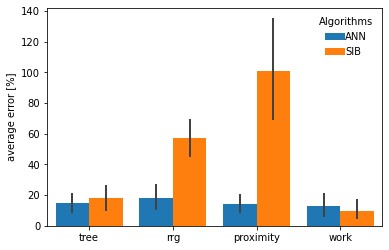

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="type", y="err_lambda_per", hue="algo",
                 data=all_pd, palette="tab10", errwidth=2,saturation=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("average error [%]")
plt.xlabel("")
plt.savefig("img/params.pdf")
plt.savefig("img/params.png")
plt.show()

In [66]:
res_loss

,loss,loss_rand,beta,beta_rand,diff_loss
0,-5981.054912,-5995.789780,1.0,1.0,14.734868
1,-6392.288330,-6399.398618,1.0,1.0,7.110288
2,-7594.261860,-7614.247612,1.0,1.0,19.985752
3,-9837.280664,-9848.598203,1.0,1.0,11.317539
4,-9168.250859,-9153.891816,1.0,1.0,-14.359043
5,-6590.392354,-6629.016465,1.0,1.0,38.624111
6,-8685.145654,-8688.818809,1.0,1.0,3.673154
7,-9225.831807,-9229.507461,1.0,1.0,3.675654
8,-9556.180342,-9563.075723,1.0,1.0,6.895381
9,-6962.919248,-6980.387471,1.0,1.0,17.468223


Text(0, 0.5, '$\\gamma$')

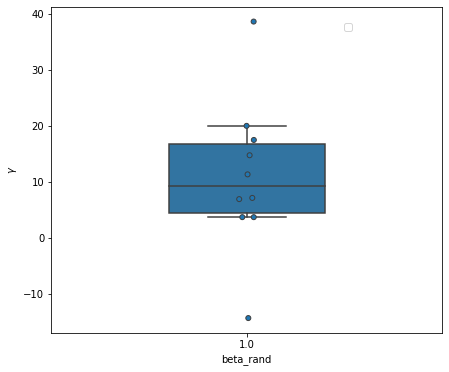

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="beta_rand", y="diff_loss", data=res_loss,
             width=0.4,fliersize=0)

sns.stripplot(x="beta_rand", y="diff_loss", data=res_loss,
              size=5, linewidth=1, dodge=1, jitter=.02)
ax.set(ylabel="")
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)
ax.set_ylabel("$\gamma$")
#sns.despine(trim=True, left=True)

Text(0, 0.5, '$\\gamma$')

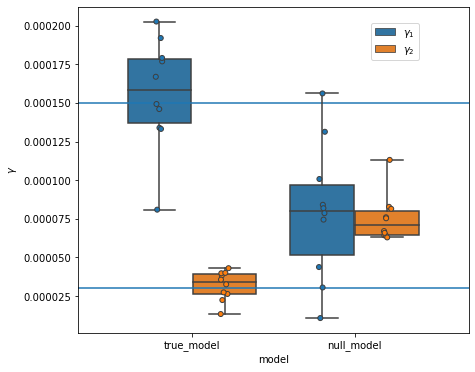

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="model", y="val",hue="type", data=res_gamma,
            whis=[0, 100], width=0.8,fliersize=0)

sns.stripplot(x="model", y="val", hue="type", data=res_gamma,
              size=5, linewidth=1, dodge=1, jitter=.05)
ax.set(ylabel="")
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)

plt.hlines(1.5e-4, -0.7,1.7)
plt.hlines(3e-5, -0.7,1.7)
ax.set_ylabel("$\gamma$")

Text(19.200000000000003, 0.5, '$\\gamma$')

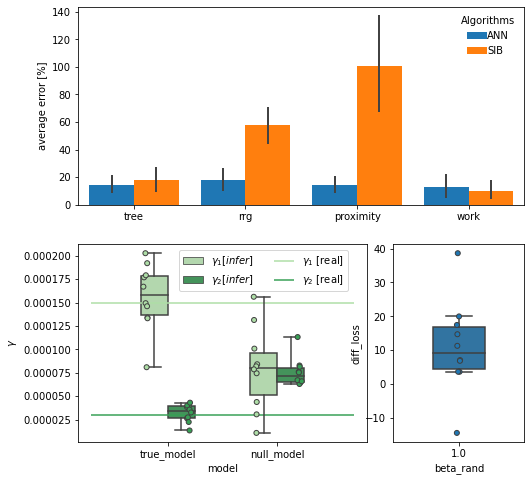

In [69]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec

colors_gammas = list(sns.color_palette(n_colors=2, palette="Greens"))

fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 3) 
ax0 = plt.subplot(gs[0, :])
ax0 = sns.barplot(x="type", y="err_lambda_per", hue="algo",
                 data=all_pd, palette="tab10", errwidth=2,saturation=1)
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("average error [%]")
plt.xlabel("")

ax1 = plt.subplot(gs[1,0:2])

sns.boxplot(x="model", y="val",hue="type", data=res_gamma,
            whis=[0, 100], width=0.5,fliersize=0, palette="Greens")

sns.stripplot(x="model", y="val", hue="type", data=res_gamma,
              size=5, linewidth=1, dodge=1, jitter=.05, palette="Greens")
ax1.set(ylabel="")
ax1.hlines(1.5e-4, -0.7,1.7, color=colors_gammas[0],label="$\gamma_1$ [real Value]")
ax1.hlines(3e-5, -0.7,1.7, color=colors_gammas[1],label="$\gamma_2$ [real Value]")

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend([handles[0],handles[1],handles[4],handles[5]], 
["$\gamma_1 [infer]$", "$\gamma_2 [infer]$", "$\gamma_1$ [real]", "$\gamma_2$ [real]",], 
bbox_to_anchor=(0.35, 0.97), loc=2, borderaxespad=0., ncol=2)


ax1.set_ylabel("$\gamma$")

ax2 = plt.subplot(gs[1, 2])
sns.boxplot(x="beta_rand", y="diff_loss", data=res_loss,
             width=0.4,fliersize=0)

sns.stripplot(x="beta_rand", y="diff_loss", data=res_loss,
              size=5, linewidth=1, dodge=1, jitter=.02)
ax.set(ylabel="")
handles, labels = ax.get_legend_handles_labels()
#l = plt.legend([], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(, 0.68), loc=2, borderaxespad=0.)
ax.set_ylabel("$\gamma$")



Text(19.200000000000003, 0.5, '$\\gamma$')

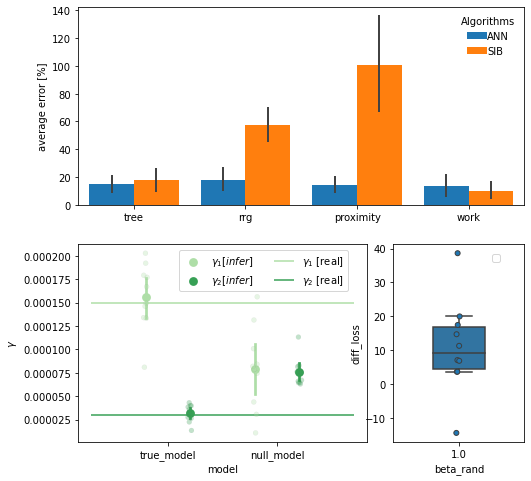

In [70]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec

colors_gammas = list(sns.color_palette(n_colors=2, palette="Greens"))

fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 3) 
ax0 = plt.subplot(gs[0, :])
ax0 = sns.barplot(x="type", y="err_lambda_per", hue="algo",
                 data=all_pd, palette="tab10", errwidth=2,saturation=1)
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("average error [%]")
plt.xlabel("")

ax1 = plt.subplot(gs[1,0:2])

sns.pointplot(x="model", y="val",hue="type", data=res_gamma,
            whis=[0, 100], width=0.5,fliersize=0, palette="Greens", join=False,
            dodge=.67 - .8 / 3, linewidth=0.1, )

sns.stripplot(x="model", y="val", hue="type", data=res_gamma,
              size=5, linewidth=0.1, dodge=1, jitter=.05, palette="Greens", alpha=0.3)
ax1.set(ylabel="")
ax1.hlines(1.5e-4, -0.7,1.7, color=colors_gammas[0],label="$\gamma_1$ [real Value]")
ax1.hlines(3e-5, -0.7,1.7, color=colors_gammas[1],label="$\gamma_2$ [real Value]")

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend([handles[0],handles[1],handles[4],handles[5]], 
["$\gamma_1 [infer]$", "$\gamma_2 [infer]$", "$\gamma_1$ [real]", "$\gamma_2$ [real]",], 
bbox_to_anchor=(0.35, 0.97), loc=2, borderaxespad=0., ncol=2)


ax1.set_ylabel("$\gamma$")

ax2 = plt.subplot(gs[1, 2])
sns.boxplot(x="beta_rand", y="diff_loss", data=res_loss,
             width=0.4,fliersize=0)

sns.stripplot(x="beta_rand", y="diff_loss", data=res_loss,
              size=5, linewidth=1, dodge=1, jitter=.02)
ax.set(ylabel="")
handles, labels = ax.get_legend_handles_labels()
l = plt.legend([], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)
ax.set_ylabel("$\gamma$")



Text(0.5, 0, 'hospital')

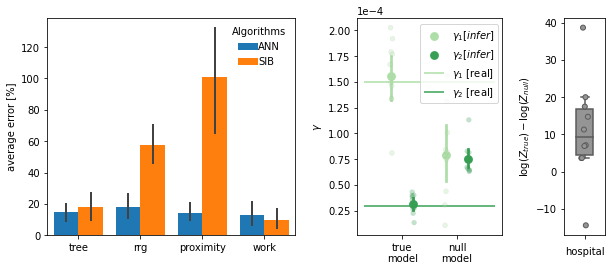

In [85]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec

colors_gammas = list(sns.color_palette(n_colors=2, palette="Greens"))

fig = plt.figure(figsize=(10, 4)) 
gs = gridspec.GridSpec(1, 6, wspace=1.5) 
ax0 = plt.subplot(gs[0, 0:3])
ax0 = sns.barplot(x="type", y="err_lambda_per", hue="algo",
                 data=all_pd, palette="tab10", errwidth=2,saturation=1)
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("average error [%]")
plt.xlabel("")

ax1 = plt.subplot(gs[0,3:5])

sns.pointplot(x="model", y="val",hue="type", data=res_gamma,
            whis=[0, 100], width=0.5,fliersize=0, palette="Greens", join=False,
            dodge=.67 - .8 / 3, linewidth=0.1, )

sns.stripplot(x="model", y="val", hue="type", data=res_gamma,
              size=5, linewidth=0.1, dodge=1, jitter=.05, palette="Greens", alpha=0.3)
ax1.set(ylabel="")
ax1.hlines(1.5e-4, -0.7,1.7, color=colors_gammas[0],label="$\gamma_1$ [real Value]")
ax1.hlines(3e-5, -0.7,1.7, color=colors_gammas[1],label="$\gamma_2$ [real Value]")

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend([handles[0],handles[1],handles[4],handles[5]], 
["$\gamma_1 [infer]$", "$\gamma_2 [infer]$", "$\gamma_1$ [real]", "$\gamma_2$ [real]",], 
bbox_to_anchor=(0.43, 0.97), loc=2, borderaxespad=0., ncol=1)
ax1.set_xticklabels( ('true\nmodel', 'null\nmodel') )
ax1.set_xlabel("")

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax1.set_ylabel("$\gamma$")

ax2 = plt.subplot(gs[0, 5])
sns.boxplot(x="beta_rand", y="diff_loss", data=res_loss,
             width=0.4,fliersize=0, palette="Greys")

sns.stripplot(x="beta_rand", y="diff_loss", data=res_loss,
              size=5, linewidth=1,palette="Greys")
handles, labels = ax.get_legend_handles_labels()
#l = plt.legend([], ["$\gamma_1$", "$\gamma_2$"], bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)
ax2.set_ylabel("$\log(Z_{true}) - \log(Z_{null})$")
ax2.set_xticklabels([])
ax2.set_xlabel("hospital")



In [83]:
handles, labels = ax1.get_legend_handles_labels()
*handles

SyntaxError: can't use starred expression here (4028977915.py, line 2)

In [64]:
[**handles[0:2], **handles[4:6]]

SyntaxError: invalid syntax (4061926493.py, line 1)

In [58]:
sns.color_palette?

Signature: sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
Docstring:
Return a list of colors or continuous colormap defining a palette.

Possible ``palette`` values include:
    - Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
    - Name of matplotlib colormap
    - 'husl' or 'hls'
    - 'ch:<cubehelix arguments>'
    - 'light:<color>', 'dark:<color>', 'blend:<color>,<color>',
    - A sequence of colors in any format matplotlib accepts

Calling this function with ``palette=None`` will return the current
matplotlib color cycle.

This function can also be used in a ``with`` statement to temporarily
set the color cycle for a plot or set of plots.

See the :ref:`tutorial <palette_tutorial>` for more information.

Parameters
----------
palette : None, string, or sequence, optional
    Name of palette or None to return current palette. If a sequence, input
    colors are used but possibly cycled and desaturated.
n_colors : int, optional
 

In [26]:
means=[]
for g in graphs:
    means
    ann={"algo":"ann"
        
        }
    ann = res_params[g][res_params[g]["algo"]=="ANN"]["lambda_inf"].mean()
    sib = res_params[g][res_params[g]["algo"]=="SIB"]["lambda_inf"].mean()
    l = res_params[g]["lambda"].mean()
    annM = res_params[g][res_params[g]["algo"]=="ANN"]["mu_inf"].mean()
    sibM = res_params[g][res_params[g]["algo"]=="SIB"]["mu_inf"].mean()
    mu = res_params[g]["mu"].mean()
    print(sib, ann)
    means.append({"algo":"sib", "mean":sib, "type":g, 
                  "err":abs(sib-l), "err_per":100*abs(sib-l)/l,
                 "err_mu":abs(sibM-mu), "err_per_mu":100*abs(sibM-mu)/(mu+1e-2)})
    means.append({"algo":"ann", "mean":ann, "type":g,
                  "err":abs(ann-l), "err_per":100*abs(ann-l)/l,
                 "err_mu":abs(annM-mu), "err_per_mu":100*abs(annM-mu)/(mu+1e-2)})

means = pd.DataFrame(means)
means

0.36657219990450707 0.3452567524380154
0.053345754636064564 0.03955619057847389
0.05782300549375749 0.029113213428192633
0.0010642633593552003 0.0009051131589027222


,algo,mean,type,err,err_per,err_mu,err_per_mu
0,sib,0.366572,TREE,0.016572,4.734914,9.999995e-07,0.010000
1,ann,0.345257,TREE,0.004743,1.355214,1.000000e-06,0.010000
2,sib,0.053346,rrg,0.013346,33.364387,4.499054e-03,14.996846
3,ann,0.039556,rrg,0.000444,1.109524,3.419444e-04,1.139815
4,sib,0.057823,proximity,0.027823,92.743352,5.684495e-03,18.948315
5,ann,0.029113,proximity,0.000887,2.955955,5.080251e-03,16.934171
6,sib,0.001064,work,0.000064,6.426336,8.292385e-04,2.764128
7,ann,0.000905,work,0.000095,9.488684,2.569880e-04,0.856627


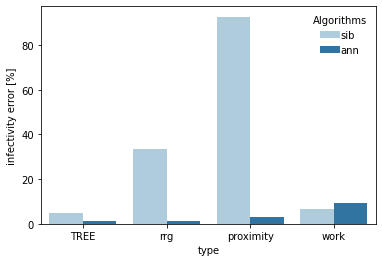

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="type", y="err_per", hue="algo",
                 data=means, dodge=True, ci=0.3, palette="Paired")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("infectivity error [%]")
plt.show()

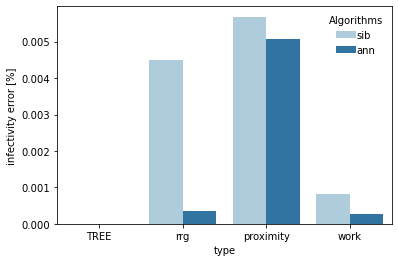

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="type", y="err_mu", hue="algo",
                 data=means, dodge=True, ci=0.3, palette="Paired")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("infectivity error [%]")
#plt.ylim(0,150)
plt.show()